In [2]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from datetime import datetime
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Retrieve data
ticker = 'AAPL'
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2020-01-01', end=end_date)

In [ ]:
# Create connection to sqlite
conn = sqlite3.connect(':memory:')

# Store data in table
data.to_sql('stock_prices', conn, if_exists='replace', index=True)

In [ ]:
# Retrieve data from sqlite
query = "SELECT* FROM stock_prices"
df = pd.read_sql(query, conn)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Normalize and standardize the 'close' prices
df['Close'] = StandardScaler().fit_transform(df[['Close']])

In [ ]:
# Train a linear regression model
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

df.head()

In [ ]:
# Create a line chart of the 'Close' price
plt.plot(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.title('Stock Close Price')
plt.legend()
plt.show()

In [2]:
stock = yf.Ticker("MSFT")
stock = stock.history(period='2y')


In [4]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,0.0,0.0
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,0.0,0.0
2022-08-10 00:00:00-04:00,283.195800,284.807475,281.987020,284.168701,24687800,0.0,0.0
2022-08-11 00:00:00-04:00,285.829611,286.183383,281.564528,282.065704,20065900,0.0,0.0
2022-08-12 00:00:00-04:00,283.500490,286.871277,281.987064,286.871277,22619700,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,0.0,0.0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,0.0,0.0
2024-08-01 00:00:00-04:00,420.790009,427.459991,413.089996,417.109985,30296400,0.0,0.0


In [5]:
del stock['Dividends']
del stock['Stock Splits']

In [6]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200
2022-08-10 00:00:00-04:00,283.195800,284.807475,281.987020,284.168701,24687800
2022-08-11 00:00:00-04:00,285.829611,286.183383,281.564528,282.065704,20065900
2022-08-12 00:00:00-04:00,283.500490,286.871277,281.987064,286.871277,22619700
...,...,...,...,...,...
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400
2024-08-01 00:00:00-04:00,420.790009,427.459991,413.089996,417.109985,30296400


<Axes: xlabel='Date'>

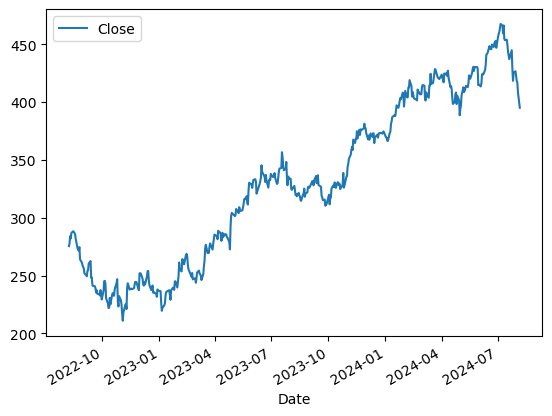

In [7]:
stock.plot.line(y="Close")

In [8]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [9]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,277.427094
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,284.168701
2022-08-10 00:00:00-04:00,283.195800,284.807475,281.987020,284.168701,24687800,282.065704
2022-08-11 00:00:00-04:00,285.829611,286.183383,281.564528,282.065704,20065900,286.871277
2022-08-12 00:00:00-04:00,283.500490,286.871277,281.987064,286.871277,22619700,288.404327
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985
2024-08-01 00:00:00-04:00,420.790009,427.459991,413.089996,417.109985,30296400,408.489990


In [10]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [11]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,277.427094,1
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,284.168701,1
2022-08-10 00:00:00-04:00,283.195800,284.807475,281.987020,284.168701,24687800,282.065704,0
2022-08-11 00:00:00-04:00,285.829611,286.183383,281.564528,282.065704,20065900,286.871277,1
2022-08-12 00:00:00-04:00,283.500490,286.871277,281.987064,286.871277,22619700,288.404327,1
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006,0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985,0
2024-08-01 00:00:00-04:00,420.790009,427.459991,413.089996,417.109985,30296400,408.489990,0


In [12]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [13]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [15]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5696 - loss: 0.6952
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5546 - loss: 0.6889
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5540 - loss: 0.6835
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6282 - loss: 0.6802
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6542 - loss: 0.6780
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.6500 - loss: 0.6734
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.6613 - loss: 0.6681
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6525 - loss: 0.6623
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6487 - loss: 0.6607
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.6408 - loss: 0.6553
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6478 - loss: 0.6491
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9011 - loss: 0.2501
Test Loss: 0.27217575907707214, Test Accuracy: 0.8700000047683716


In [19]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [20]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [21]:
precision_score(y_test,predictions)

0.9534883720930233

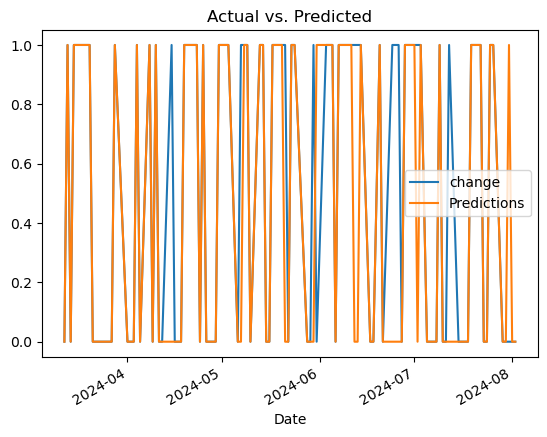

In [22]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')
plt.show()

In [23]:
# Prepare latest data for prediction
latest_data = X_scaled[-1].reshape(1, -1)  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns=X.columns)

In [24]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data_df).round().flatten()[0]
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Prediction for the next day: Stock Will Go Down


In [35]:
stock = yf.Ticker("MSFT")
stock = stock.news

stock

[{'uuid': '0301ed0b-f72f-30ff-8fda-dc79ff7ef765',
  'title': "Dow Jones Futures Bounce: 'Fear Index' Soars As Apple, Nvidia, Tesla Dive; AI Stock Palantir Surges On Earnings",
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/0301ed0b-f72f-30ff-8fda-dc79ff7ef765/dow-jones-futures-bounce%3A.html',
  'providerPublishTime': 1722904511,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/eymQVLcg4AKsWPu_5soa1A--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/f6a1c2a30ab1ccd7c6fc3e462e6a2395',
     'width': 1000,
     'height': 563,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/HerWwA0dyl2gggwI91siyg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/f6a1c2a30ab1ccd7c6fc3e462e6a2395',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^DJI',
   'TSLA',
   'NVDA',
   'AAPL',
   'PLTR',


[*********************100%%**********************]  10 of 10 completed


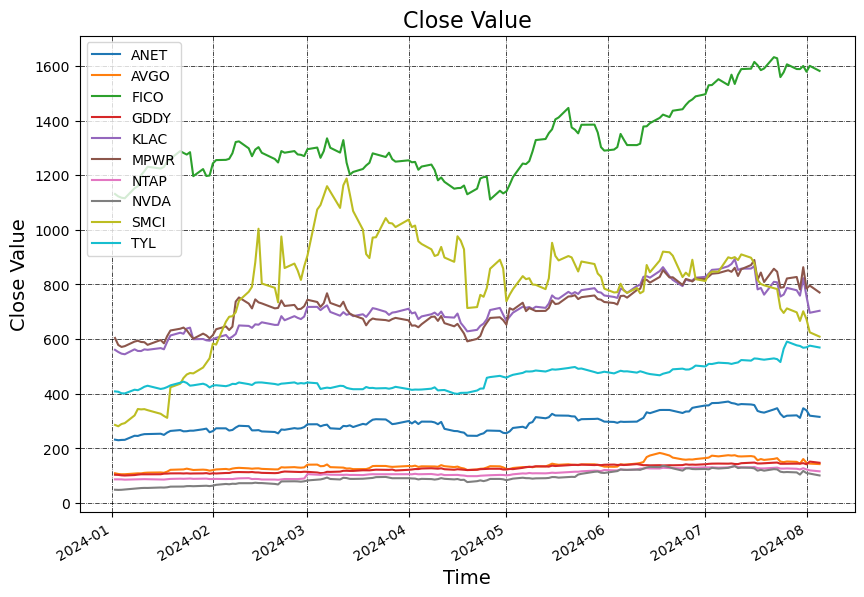

In [26]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']

# Plot all the close prices
((data.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [27]:
data.describe()

Ticker,ANET,AVGO,FICO,GDDY,KLAC,MPWR,NTAP,NVDA,SMCI,TYL
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,293.820336,136.925919,1323.110676,125.602014,710.948524,717.568994,106.804698,92.549235,793.512615,459.538658
std,34.256998,17.511584,139.283735,14.113993,83.998576,80.347995,15.401525,23.425835,204.240919,45.034881
min,229.399994,104.901001,1110.849976,100.220001,544.309998,571.059998,84.599998,47.569000,280.640015,399.220001
25%,265.510010,125.681999,1230.989990,113.000000,653.840027,652.590027,89.120003,78.538002,717.020020,421.079987
50%,289.320007,133.149002,1284.270020,123.830002,699.210022,717.640015,104.800003,89.452003,827.940002,440.980011
75%,316.989990,143.617004,1390.589966,139.279999,772.359985,779.580017,122.260002,114.250000,904.400024,488.239990
max,371.070007,182.886993,1632.170044,151.250000,892.349976,889.479980,134.619995,135.580002,1188.069946,590.650024


In [28]:
# Calculate the mean and standard deviation for each stock
mean = data.mean()
std_dev = data.std()

# Calculate the z-scores
z_scores = (data - mean) / std_dev

print("Z-Scores:")
z_scores.head()

Z-Scores:


Ticker,ANET,AVGO,FICO,GDDY,KLAC,MPWR,NTAP,NVDA,SMCI,TYL
Date,,,,,,,,,,
2024-01-02,-1.817449,-1.621094,-1.378127,-1.601390,-1.792394,-1.413464,-1.337186,-1.894542,-2.487565,-1.139975
2024-01-03,-1.880502,-1.774135,-1.441236,-1.637525,-1.885252,-1.733323,-1.330693,-1.920112,-2.511116,-1.168842
2024-01-04,-1.846640,-1.828785,-1.476488,-1.747345,-1.958468,-1.823431,-1.346925,-1.901799,-2.471163,-1.291191
2024-01-05,-1.836131,-1.827243,-1.490847,-1.798358,-1.983826,-1.786964,-1.411204,-1.854885,-2.454859,-1.303848
2024-01-08,-1.400307,-1.681225,-1.225417,-1.676493,-1.768941,-1.578869,-1.352119,-1.720162,-2.317031,-1.001860


In [29]:
# Calculate the average z-score over time for each stock
average_z_scores = z_scores.mean()

print("Average Z-Scores Over Time:")
average_z_scores

Average Z-Scores Over Time:


Ticker
ANET    4.768743e-16
AVGO    1.430623e-16
FICO    6.199366e-16
GDDY    1.430623e-16
KLAC    0.000000e+00
MPWR   -6.676240e-16
NTAP   -3.338120e-16
NVDA    9.537486e-17
SMCI   -1.072967e-16
TYL     1.430623e-16
dtype: float64

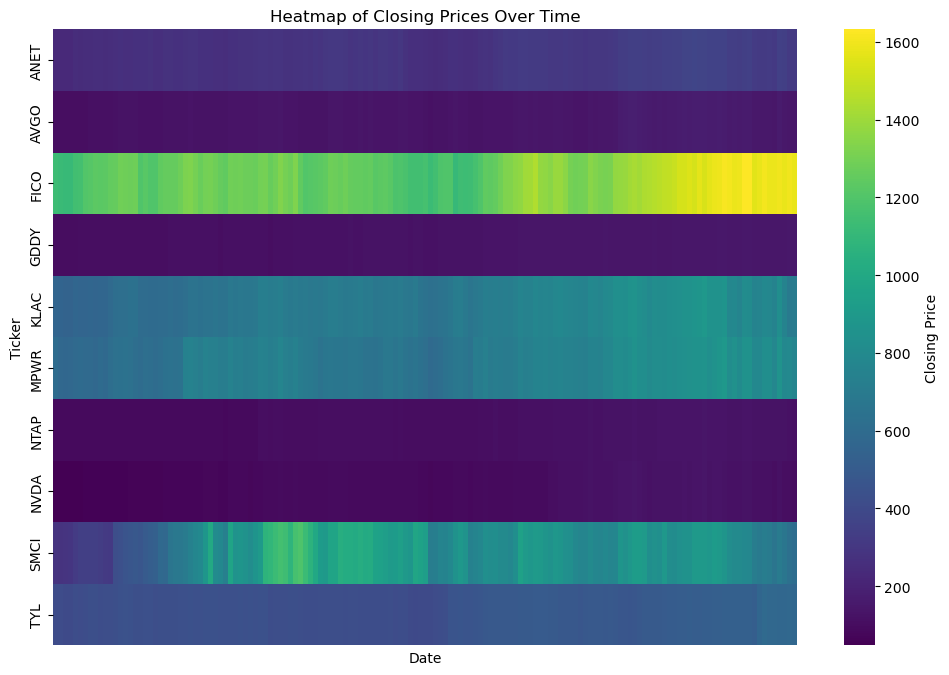

In [30]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.T, cmap='viridis', annot=False, cbar_kws={'label': 'Closing Price'})

# Set the title and labels
plt.title('Heatmap of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Remove x-axis labels and ticks
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])

plt.show()


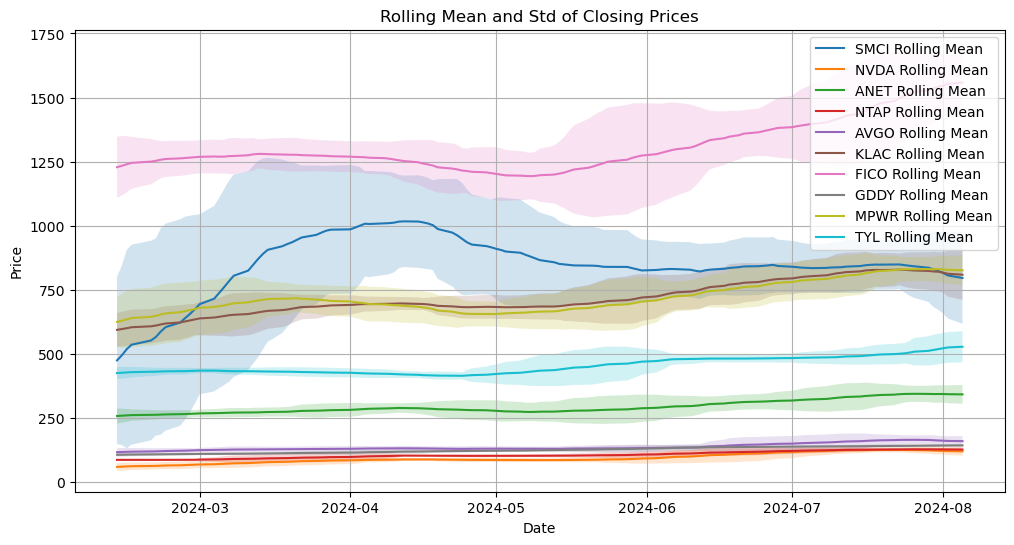

In [31]:
# Rolling Stats- shows trends and volatility (mean and std)

window_size = 30  # 30-day rolling window
plt.figure(figsize=(12, 6))
for ticker in tickers_list:
    rolling_mean = data[ticker].rolling(window=window_size).mean()
    rolling_std = data[ticker].rolling(window=window_size).std()
    plt.plot(data.index, rolling_mean, label=f'{ticker} Rolling Mean')
    plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2)
plt.title('Rolling Mean and Std of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

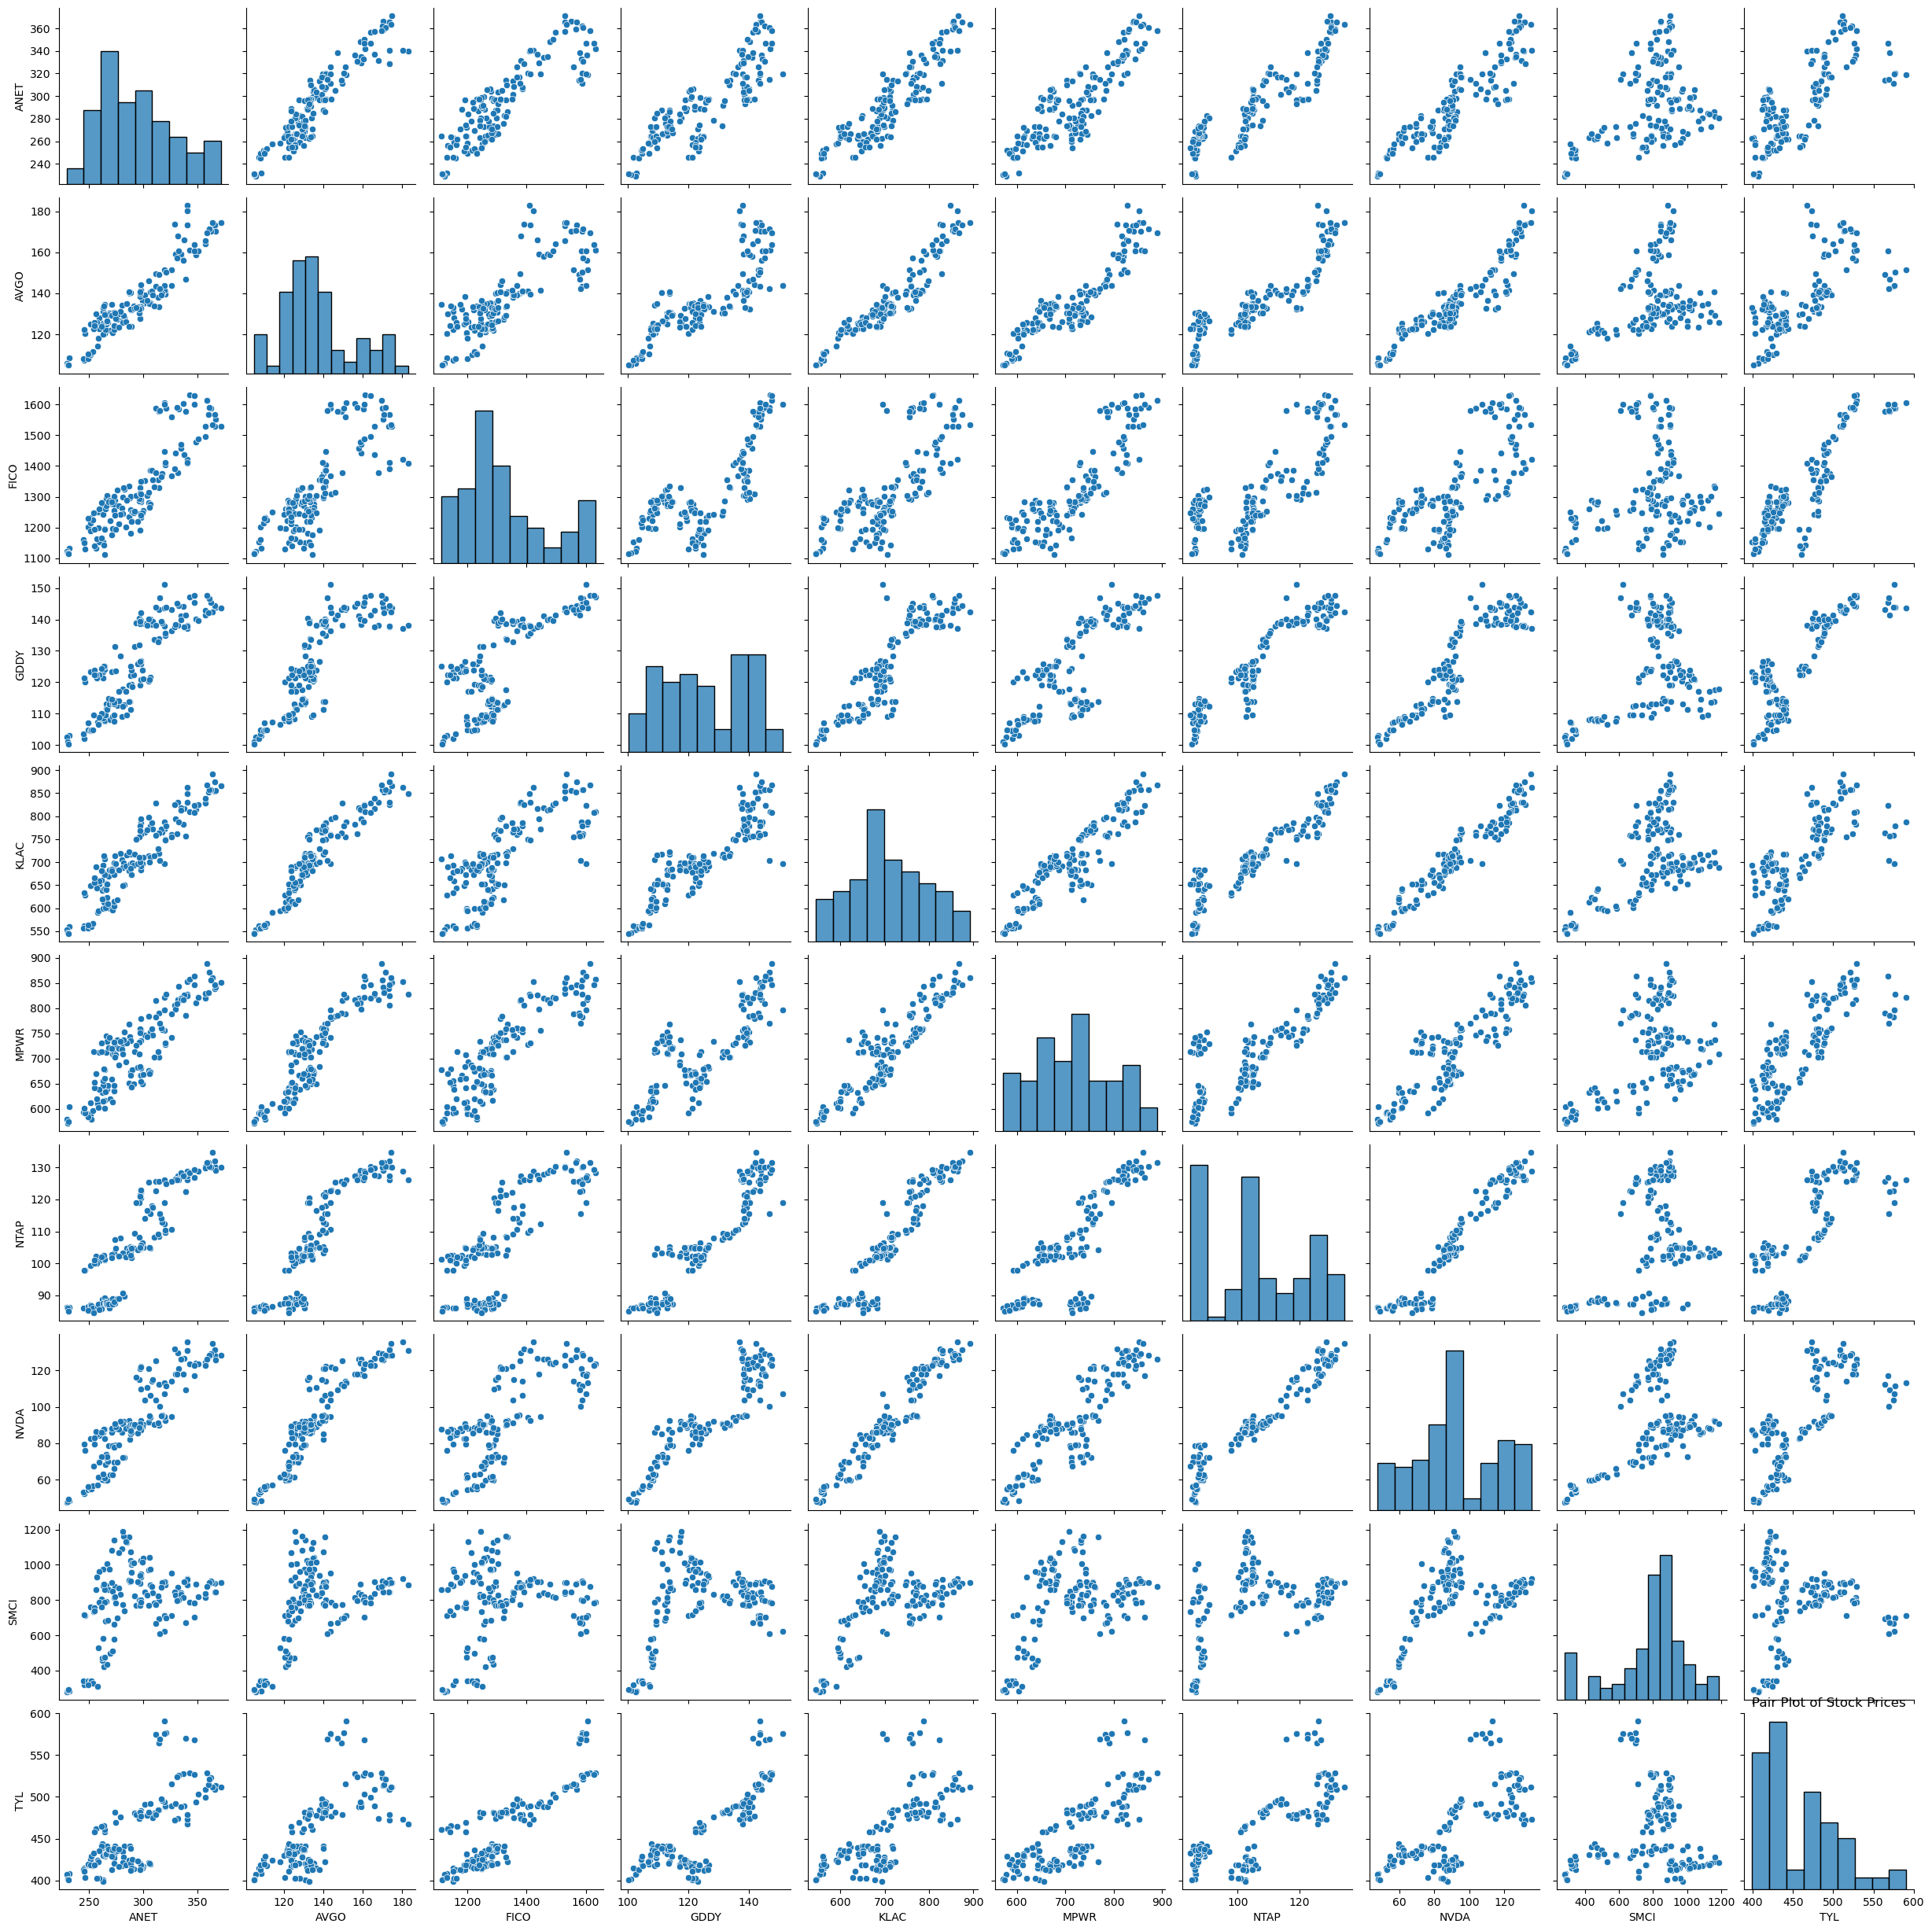

In [32]:
# Pair- shows relationships between stocks

sns.pairplot(data)
plt.title('Pair Plot of Stock Prices')
plt.show()

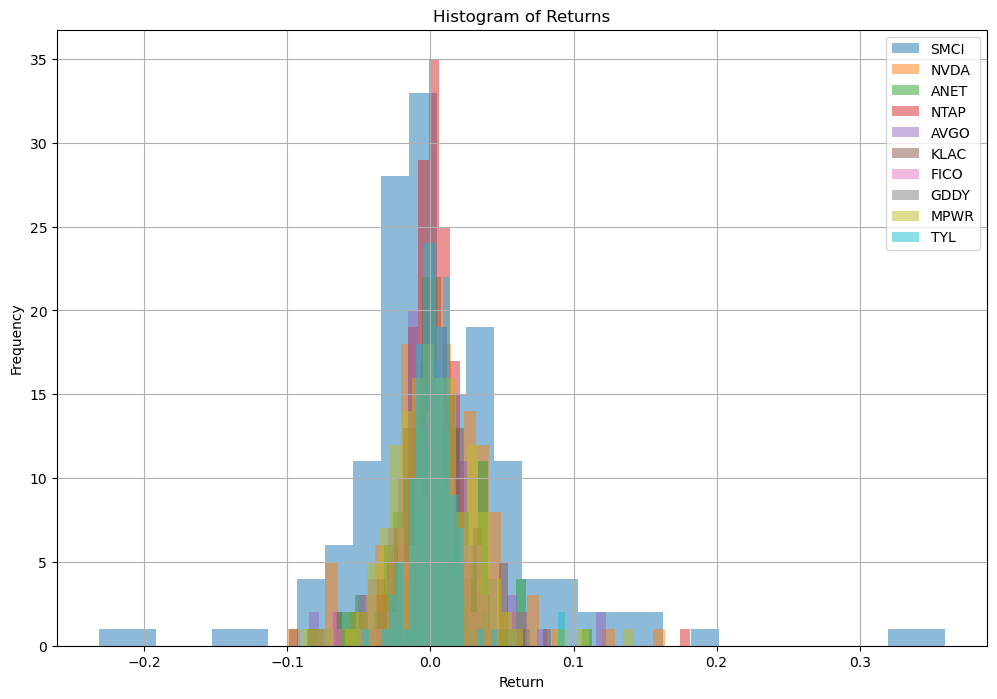

In [33]:
# Histogram - Shows the percentage change of returns to understand volatility and risk

returns = data.pct_change().dropna()
plt.figure(figsize=(12, 8))
for ticker in tickers_list:
    plt.hist(returns[ticker], bins=30, alpha=0.5, label=ticker)
plt.title('Histogram of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


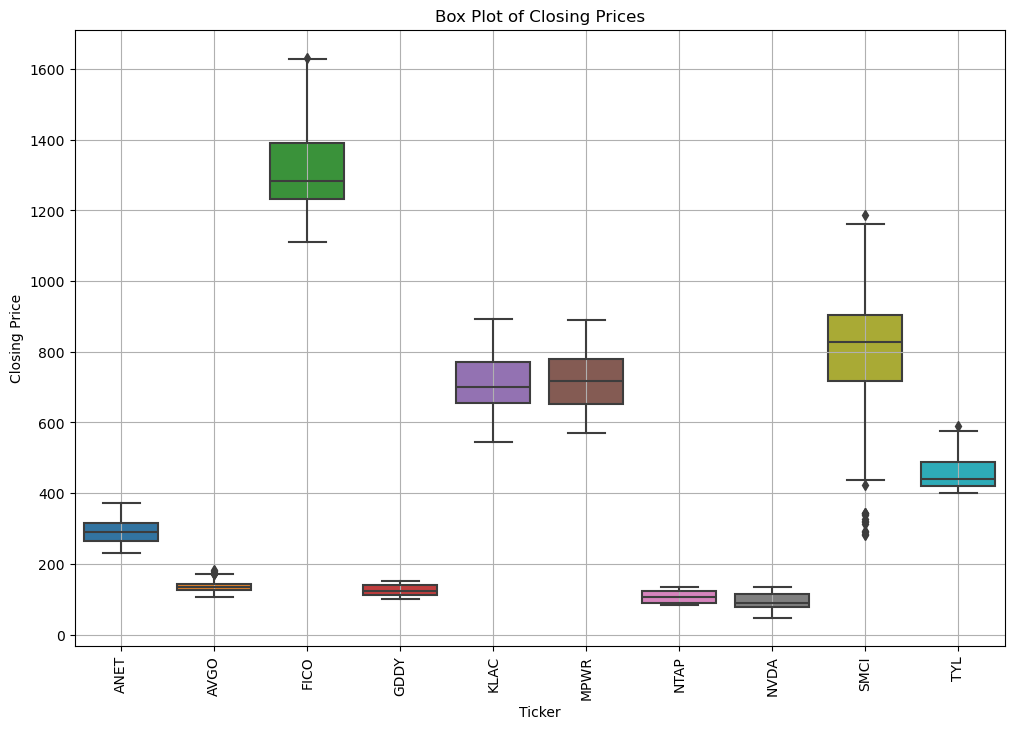

In [34]:
# Boxplot- understanding price variability: distribution of stock prices, highlighting median, quartiles, and outliers.
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plot of Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()